# Exploratory data analaysis on Iris

In [63]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydot
# Load the library with the iris dataset
from sklearn.datasets import load_iris
# Load scikit's decision tree and random forest classifier library
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Useful for separating train / test data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import label_binarize
%matplotlib inline
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.neural_network import MLPClassifier
import sklearn.datasets as datasets
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [44]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [217]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [218]:
# y is the class label 
y = df.iloc[:, 4].values

In [219]:
#df.iloc[:,[0,1]].head

In [220]:
np.unique(y)
#Y = np.where(y == 'Iris-setosa', -1, 1)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## plot the three type of iris in two dimensions

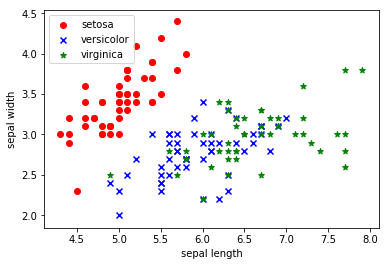

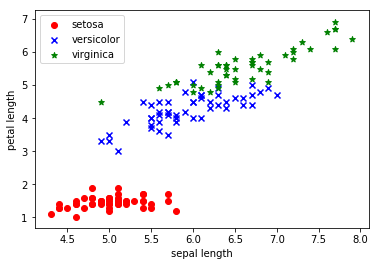

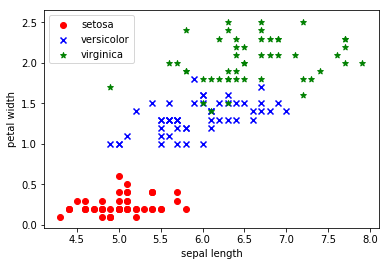

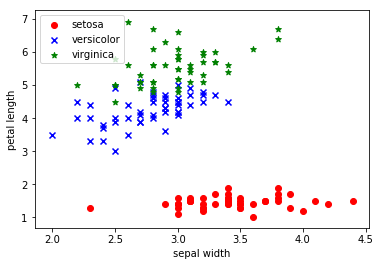

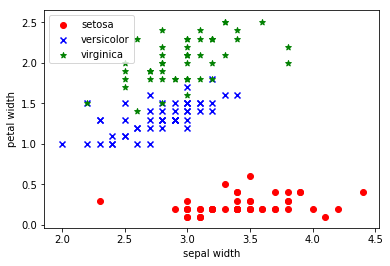

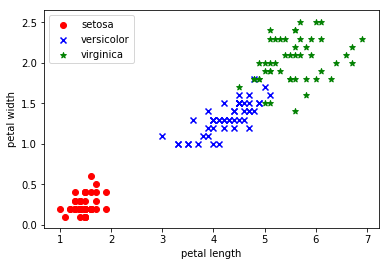

In [221]:
def irisPlot(dimension,xlabel, ylabel):
    X = df.iloc[:, dimension].values
    plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
    plt.scatter(X[100:149, 0], X[100:149, 1], color='green', marker='*', label='virginica')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.show()

irisPlot([0,1], 'sepal length', 'sepal width')
irisPlot([0,2], 'sepal length', 'petal length')
irisPlot([0,3], 'sepal length', 'petal width')
irisPlot([1,2], 'sepal width', 'petal length')
irisPlot([1,3], 'sepal width', 'petal width')
irisPlot([2,3], 'petal length', 'petal width')

In [222]:
np.random.seed(0)

In [223]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [268]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.tail()

,0,1,2,3,4,species
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica
149,5.9,3.0,5.1,1.8,Iris-virginica,virginica


In [225]:
for i in range(4):
    df_desc = df.iloc[:,[i,4]].groupby('species').describe().reset_index()

    print(df_desc)

      species sepal length (cm)                                            
                          count   mean       std  min    25%  50%  75%  max
0      setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
1  versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
2   virginica              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9
      species sepal width (cm)                                              
                         count   mean       std  min    25%  50%    75%  max
0      setosa             50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
1  versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
2   virginica             50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8
      species petal length (cm)                                             
                          count   mean       std  min  25%   50%    75%  max
0      setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9
1  v

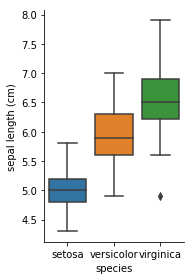

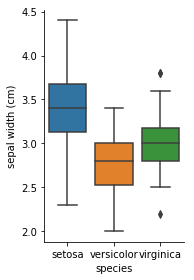

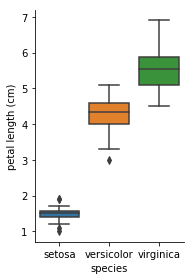

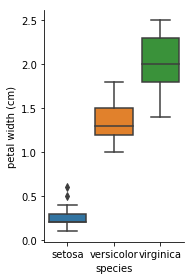

In [226]:
g = sns.factorplot(x="species", y="sepal length (cm)", data=df, kind="box", size=4, aspect=.7);
g = sns.factorplot(x="species", y="sepal width (cm)", data=df, kind="box", size=4, aspect=.7);
g = sns.factorplot(x="species", y="petal length (cm)", data=df, kind="box", size=4, aspect=.7);
g = sns.factorplot(x="species", y="petal width (cm)", data=df, kind="box", size=4, aspect=.7);

In [227]:
# Pearson correlation
df.corr()

# Kendall Tau correlation
df.corr('kendall')

# Spearman Rank correlation
df.corr('spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.159457,0.881386,0.834421
sepal width (cm),-0.159457,1.000000,-0.303421,-0.277511
petal length (cm),0.881386,-0.303421,1.000000,0.936003
petal width (cm),0.834421,-0.277511,0.936003,1.000000


# Decision Tree

In [239]:
# Split the training and test data
train, test = train_test_split(df, test_size=0.3)

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 105
Number of observations in the test data: 45


In [240]:
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [241]:
"""
The species names are encoded as integers either 0, 1, or 2.
"""

def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [242]:
train_encoded, targets = encode_target(train, 'species')
y = train_encoded['Target']

In [249]:
# Create a decision tree classifier.
#dt_clf = DecisionTreeClassifier(min_samples_split=20, max_depth=4, max_features = 3, random_state=99)
dt_clf = DecisionTreeClassifier(random_state=99)
dt_clf.fit(train[features], y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [257]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [250]:
cross_val_score(dt_clf, train[features], train["species"], cv=10)

array([ 1.        ,  1.        ,  0.91666667,  1.        ,  1.        ,
        1.        ,  1.        ,  0.9       ,  0.88888889,  0.88888889])

In [251]:
# View the predicted probabilities of the first few test points for the dt classifier
dt_clf.predict_proba(test[features])[0:5]

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [252]:
# Create actual english names for the plants for each predicted plant class
dt_predictions = targets[dt_clf.predict(test[features])]

In [256]:
accuracy_score(test['species'],dt_predictions)*100

93.333333333333329

In [253]:
# Create confusion matrix
pd.crosstab(test['species'], dt_predictions, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,versicolor,virginica,setosa
Actual Species,,,
setosa,0,0,12
versicolor,17,0,0
virginica,3,13,0


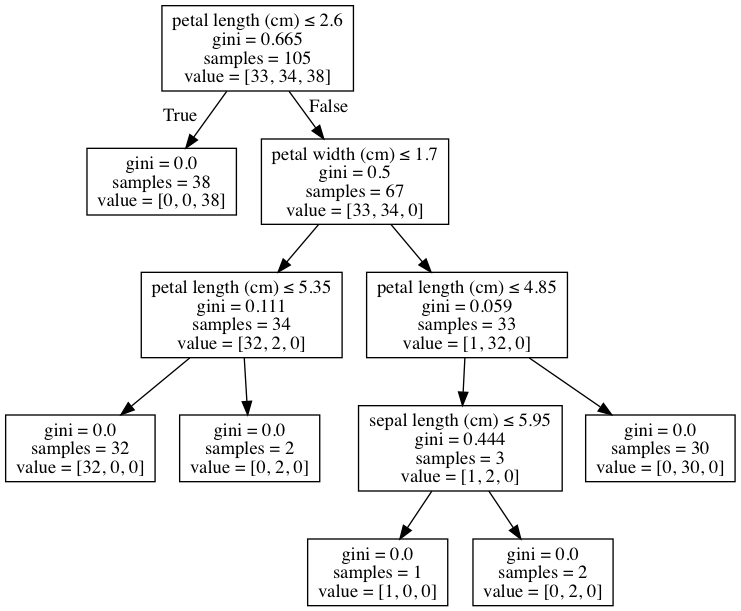

In [254]:
dot_data = StringIO()  
export_graphviz(dt_clf, out_file=dot_data,  
                    feature_names=features,
#                     class_names=tree.classes_,  
#                     filled=True, rounded=True,  
                    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png())  

## explain GINI index here
GINI index is used here for information gain, there's two options given in sklearn, gini index or entropy. The default is gini index, which is a criterion to minimize the probability of misclasification
$Gini =1 - \sum_{j}p_j^2$
Where $p_j$ is the probability of class _j_.

## write up about the descision tree above 

since sklearn doesn't have pruning implemented, the way we can limit the size of the tree is by tuning parameters min_samples_split, max_depth, ; 

## Grid search on the best parameters

In [195]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={
                      #'max_depth': range(1,5,2)}, 
                      #'min_samples_split': range(2, 6, 1)},
                      'max_leaf_nodes': range(2,8,1)},
                  scoring=scoring, cv=5, refit='AUC')
y = label_binarize(y, classes=[0, 1, 2])
gs.fit(train[features], y)
results = gs.cv_results_

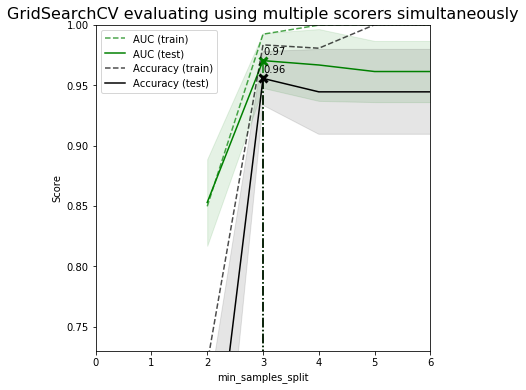

In [197]:
import warnings; warnings.simplefilter('ignore')

plt.figure(figsize=(6, 6))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 6)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_leaf_nodes'].data, dtype=float)

#X_axis = np.array(results['param_max_depth'].data, dtype=float)


for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

param_max_depth = 3
param_min_samples_split = 3
param_max_leaf_nodes = 3

# Neural Networks

In [352]:
datatrain = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# assign names to columns 
datatrain.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species']

# Change string value to numeric
datatrain.set_value(datatrain['species']=='Iris-setosa',['species'],0)
datatrain.set_value(datatrain['species']=='Iris-versicolor',['species'],1)
datatrain.set_value(datatrain['species']=='Iris-virginica',['species'],2)
datatrain = datatrain.apply(pd.to_numeric)

# Change dataframe to array
datatrain_array = datatrain.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(datatrain_array[:,:4],
                                                    datatrain_array[:,4],
                                                    test_size=0.3)

mlp = MLPClassifier(solver='sgd',learning_rate_init=0.01,max_iter=30, random_state=0)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [353]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.952381
Test set score: 1.000000


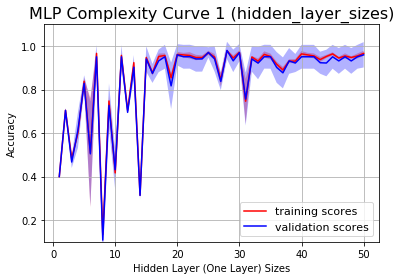

In [356]:
from sklearn.model_selection import validation_curve
def plot_curve(sizes, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

param_name="hidden_layer_sizes"
param_range=range(1,51)
val_train, val_test = validation_curve(MLPClassifier(solver='sgd', random_state=0),
                                       X_train, y_train,
                                       param_name=param_name, param_range=param_range, cv=5)
#print (val_train)
plot_curve(param_range, val_train, label='training scores', color = 'r')
plot_curve(param_range, val_test, label='validation scores', color = 'b')
plt.ylim(0.1, 1.1)
#plt.xlim(5, 800)
plt.xlabel('Hidden Layer (One Layer) Sizes'); plt.ylabel('Accuracy')
plt.title('MLP Complexity Curve 1 (hidden_layer_sizes)', fontsize=16)
plt.legend(fontsize = 11)
plt.grid()

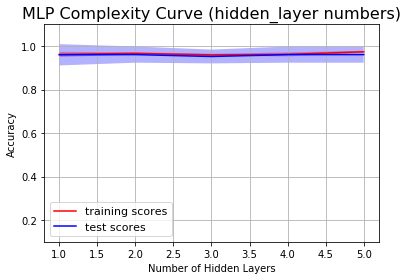

In [359]:
from sklearn.model_selection import cross_validate
val_train_result = [np.array([])]
val_train_std = np.array([])
val_test_result = np.array([])
val_test_std = np.array([])
sizes = [(20,), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)]
for i in sizes:
    clf = MLPClassifier(solver='sgd', hidden_layer_sizes = i, random_state=0)
    results = cross_validate(clf, X_train, y_train, cv=5)

    val_train_result = np.append(val_train_result, results['train_score'].mean())
    val_test_result = np.append(val_test_result, results['test_score'].mean())
    val_train_std = np.append(val_train_std, results['train_score'].std())
    val_test_std = np.append(val_test_std, results['test_score'].std())                     

lines1 = plt.plot(range(1,6),val_train_result , '-', color = 'r', label='training scores')
lines2 = plt.plot(range(1,6),val_test_result , '-', color = 'b', label='test scores')

plt.fill_between(range(1,6), val_train_result - val_train_std, val_train_result + val_train_std, edgecolor='none',
                 facecolor=lines1[0].get_color(), alpha=0.3)
plt.fill_between(range(1,6), val_test_result - val_test_std, val_test_result + val_test_std, edgecolor='none',
                 facecolor=lines2[0].get_color(), alpha=0.3)
plt.ylim(0.1, 1.1)
#plt.xlim(5, 800)
plt.xlabel('Number of Hidden Layers'); plt.ylabel('Accuracy')
plt.title('MLP Complexity Curve (hidden_layer numbers)', fontsize=16)    
plt.legend(fontsize = 11)
plt.grid()

In [299]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 0 13  2]
 [ 0 11  0]
 [ 0 19  0]]


In [300]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        15
        1.0       0.26      1.00      0.41        11
        2.0       0.00      0.00      0.00        19

avg / total       0.06      0.24      0.10        45



In [335]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    max_iter = 100

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


The species names are encoded as integers either 0, 1, or 2.




learning on dataset iris
training: constant learning-rate
Training set score: 0.961905
Training set loss: 0.288284
training: constant with momentum
Training set score: 0.971429
Training set loss: 0.049293
training: constant with Nesterov's momentum
Training set score: 0.971429
Training set loss: 0.049817
training: inv-scaling learning-rate
Training set score: 0.447619
Training set loss: 0.991928
training: inv-scaling with momentum
Training set score: 0.866667
Training set loss: 0.635230
training: inv-scaling with Nesterov's momentum
Training set score: 0.866667
Training set loss: 0.637046
training: adam
Training set score: 0.971429
Training set loss: 0.053449


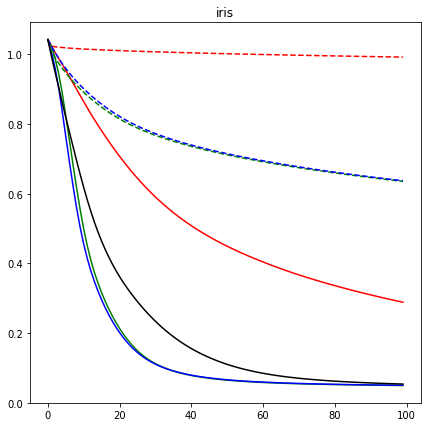

In [336]:
# load / generate some toy datasets
iris = datasets.load_iris()
data_sets = [(iris.data, iris.target)]

plt.figure(figsize=(7, 7))
ax = plt.axes()
plot_on_dataset(X_train, y_train, ax=ax, name='iris')

labels = ['constant learning-rate',
 'constant with momentum',
 "constant with Nesterov's momentum",
 'inv-scaling learning-rate',
 'inv-scaling with momentum',
 "inv-scaling with Nesterov's momentum",
 'adam']
fig.legend(ax.get_lines(), labels, 'upper center')

plt.show()

# Boosting
## Bagging

In [28]:
X, y = datasets.load_iris(return_X_y=True)

m = KNeighborsClassifier(n_neighbors=3)

bag = BaggingClassifier(
    m, 
    max_samples=.1, 
    max_features=1, 
    n_jobs=2,
    oob_score=True)

bag.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1,
         max_samples=0.1, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [29]:
bag.oob_score_

0.88

In [30]:
bag.predict([X[0]])

array([0])

In [31]:
bag.predict_proba([X[0]])

array([[ 0.76666667,  0.1       ,  0.13333333]])

In [32]:
bag.score(X, y)

0.89333333333333331

## Adaboost

In [33]:
m = AdaBoostClassifier(base_estimator=None, n_estimators=100)

In [34]:
m.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [35]:
m.score(X, y)

0.97333333333333338

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The classes in this data are [0 1 2]
Training set are 105 samples  and Test set are 45 samples

After standardizing our features,data looks like as follows:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.291459
1           0.930661          0.737219
2           1.042022          1.637313
3           0.652258          0.351465
4           1.097702          0.737219


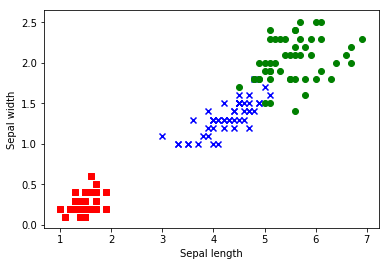

The training accuracy is 95.26%
The test accuracy is 88.87%


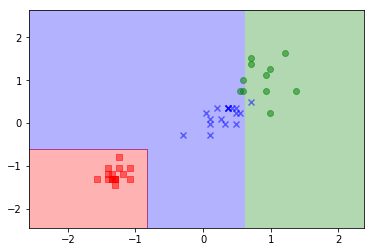

In [62]:
def main():
    ## Load the iris data 
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test,iris_df, X,y=get_data(iris)
    X_train_std,X_test_std=scale_data(X_train,X_test,iris_df)
    show_data(y_test,X,y)
    classification=Adaboost(X_train_std,y_train, X_test_std, y_test)
    classification.perform_adaboost(X_train_std, y_train, X_test_std, y_test)
    
def get_data(iris):
# Only petal length and petal width considered
    X = iris.data[:, [2, 3]]
    y = iris.target
    
# Place the iris data into a pandas dataframe
    iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the data
    print(iris_df.head())

# Print the classes of the dataset
    print('\n' + 'The classes in this data are ' + str(np.unique(y)))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

    print('Training set are {} samples  and Test set are {} samples'.format(
    X_train.shape[0], X_test.shape[0]))
    print()
    return(X_train, X_test, y_train, y_test,iris_df, X,y)
##scale the training data before training
def scale_data(X_train,X_test,iris_df):
     sc = StandardScaler()
     sc.fit(X_train)
     X_train_std = sc.transform(X_train)
     X_test_std = sc.transform(X_test)
     print('After standardizing our features,data looks like as follows:\n')
     print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())
     return(X_train_std,X_test_std)
##visualization of the data before training     
def show_data(y_test,X,y):
    ##There are 3 classes
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   c=cmap(idx), marker=markers[idx], label=cl)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
##Adaboost Class
class Adaboost(object):
   def __init__(self,X_train_std,y_train,X_test_std, y_test):
     self.X_train_std=X_train_std
     self.y_train=y_train
     self.X_test_std=X_test_std
     self.y_test=y_test
   def perform_adaboost(self,X_train_std,y_train,X_test_std, y_test): ##perform adaboost
     
      ada = AdaBoostClassifier(n_estimators=10)
      ada.fit(X_train_std, y_train)
      train_score=cross_val_score(ada,X_train_std, y_train)
      print('The training accuracy is {:.2f}%'.format(train_score.mean()*100))
      test_score=cross_val_score(ada,X_test_std, y_test)
      print('The test accuracy is {:.2f}%'.format(test_score.mean()*100))
      X=X_test_std
      y=y_test
      resolution=0.01
      #Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
      markers = ('s', 'x', 'o', '^', 'v')
      colors = ('red', 'blue', 'green', 'gray', 'cyan')
      cmap = ListedColormap(colors[:len(np.unique(y_test))])
      X=X_test_std
      y=y_test    
    # plot the decision surface
      x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

      Z = ada.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
      Z = Z.reshape(xx1.shape)
      plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())

      for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.5, c=cmap(idx),
                    marker=markers[idx], label=cl)
      plt.show()

if __name__=="__main__":
   main()

# SVM

In [69]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
clf.coef_

array([[ 1.59912171,  0.80113185]])

In [77]:
clf.score

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [108]:
iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.8 * n_sample)]
y_train = y[:int(.8 * n_sample)]
X_test = X[int(.8 * n_sample):]
y_test = y[int(.8 * n_sample):]

clf = SVC(kernel='sigmoid', gamma=10)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
accuracy_score(y_test, clf.predict(X_test))

0.5

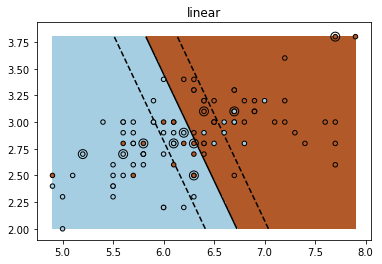

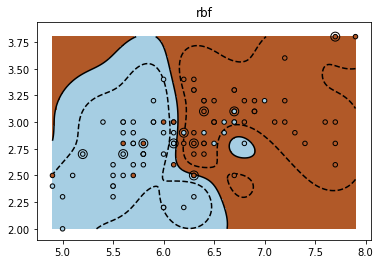

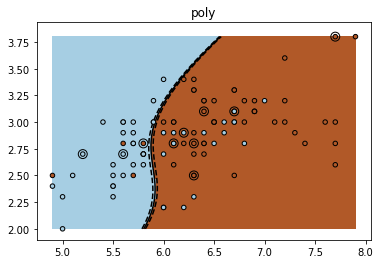

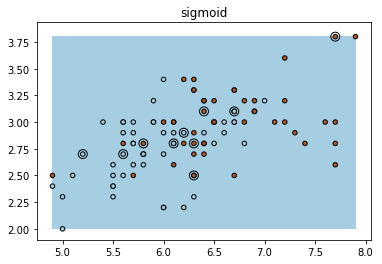

In [67]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly', 'sigmoid')):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

# K-NN

In [135]:
iris.head()

AttributeError: head

In [178]:
### Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

indices = np.random.permutation(len(iris_X))
X_train = X[:int(.8 * n_sample)]
y_train = y[:int(.8 * n_sample)]
X_test = X[int(.8 * n_sample):]
y_test = y[int(.8 * n_sample):]
# Create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.27142857142857141

## Using Cross validation for KNN

In [141]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,  names=names)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

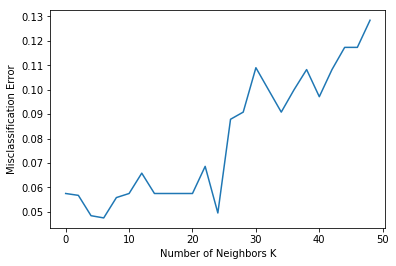

In [162]:
# plot misclassification error vs k
MSE = [1 - x for x in cv_scores]
plt.plot(range(0,50,2),MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [184]:
print(MSE)

[0.057474747474747345, 0.056717171717171722, 0.048383838383838418, 0.047474747474747447, 0.055808080808080751, 0.057474747474747345, 0.06580808080808076, 0.057474747474747345, 0.057474747474747345, 0.057474747474747345, 0.057474747474747345, 0.068585858585858417, 0.049494949494949481, 0.08787878787878789, 0.090808080808080782, 0.10898989898989897, 0.09989898989898971, 0.090808080808080782, 0.09989898989898971, 0.10823232323232312, 0.097121212121212053, 0.10823232323232312, 0.11732323232323227, 0.11732323232323216, 0.12843434343434335]
